**Name: IBRAHIM AHMED**<br/><br/>
**TASK#03 Car Price Prediction**

**Importing Libraries**

In [37]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Selling_type'] = df['Selling_type'].astype('category')
#df['Owner'] = df['Owner'].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    object  
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Driven_kms     301 non-null    int64   
 5   Fuel_Type      301 non-null    category
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int64   
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 15.5+ KB


In [42]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [43]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [44]:
df.duplicated().sum()

2

In [45]:
df = df.drop_duplicates()

In [46]:
df.duplicated().sum()

0

In [47]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       299 non-null    object  
 1   Year           299 non-null    int64   
 2   Selling_Price  299 non-null    float64 
 3   Present_Price  299 non-null    float64 
 4   Driven_kms     299 non-null    int64   
 5   Fuel_Type      299 non-null    category
 6   Selling_type   299 non-null    category
 7   Transmission   299 non-null    category
 8   Owner          299 non-null    int64   
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 17.6+ KB


In [49]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [50]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical labels for all columns
df['Fuel_Type_encoded'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type_encoded'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission_encoded'] = label_encoder.fit_transform(df['Transmission'])



In [51]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,1


In [52]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0,1,0,1
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0,2,0,1
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0,2,0,1
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0,1,0,1
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0,2,0,1


**Histogram of Selling Price**

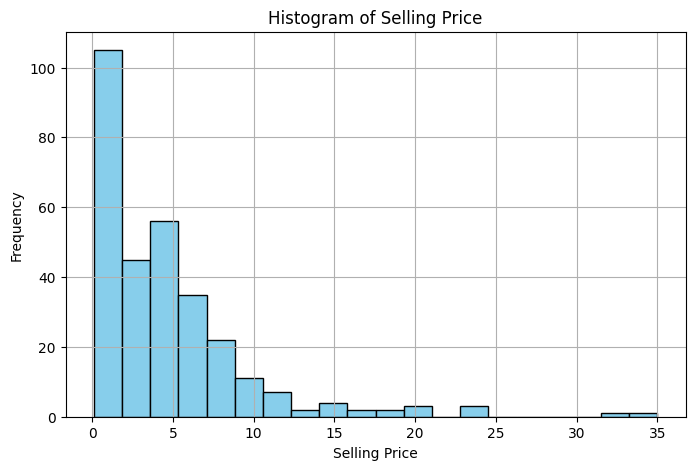

In [53]:
# Plot histogram of Selling_Price
plt.figure(figsize=(8, 5))
plt.hist(df['Selling_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Box Plot of seeling price by Fuel Type**

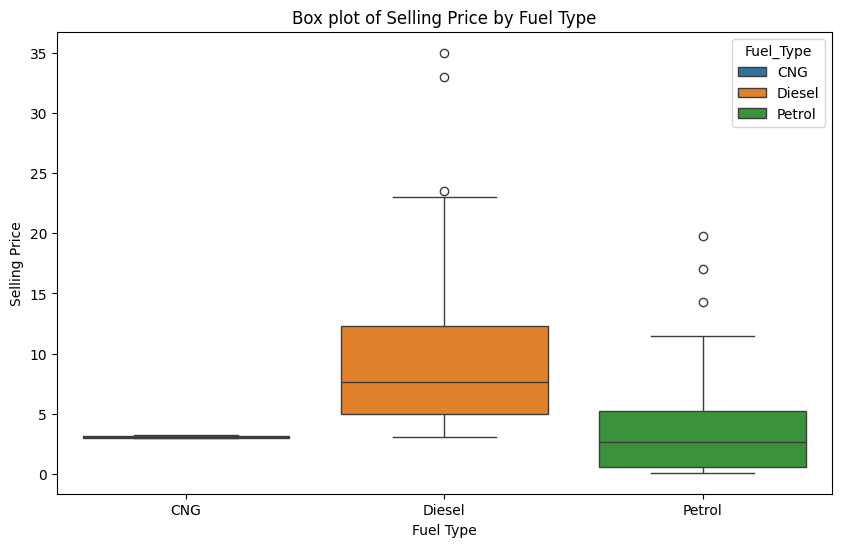

In [54]:
# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, hue='Fuel_Type', dodge=False, legend=True)
plt.title('Box plot of Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

**Scatter plot w.r.t Selling and Present Price**

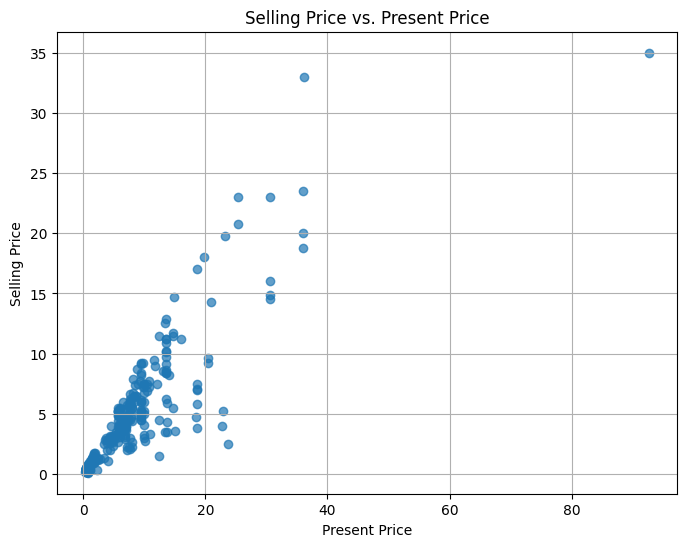

In [55]:
# Scatter plot of Selling_Price vs. Present_Price
plt.figure(figsize=(8, 6))
plt.scatter(df['Present_Price'], df['Selling_Price'], alpha=0.7)
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

**Proportion of cars according to Fuel Type**

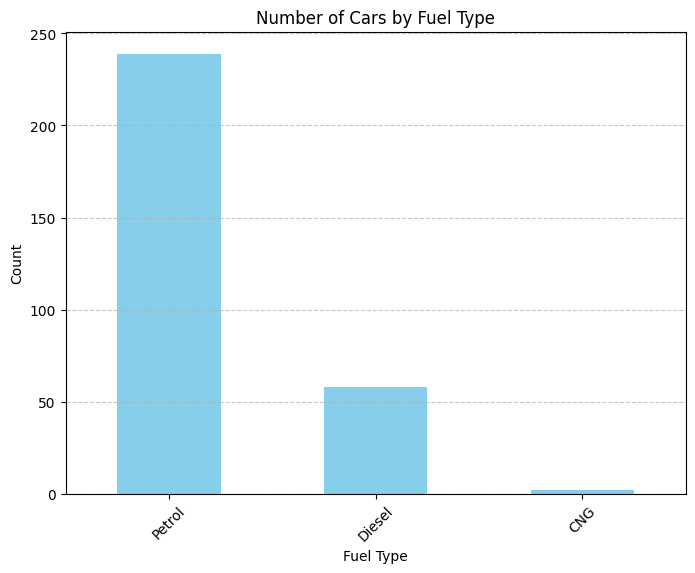

In [56]:
# Count the number of cars for each fuel type
fuel_type_counts = df['Fuel_Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
fuel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Amount of cars sold by dealers and individuals**

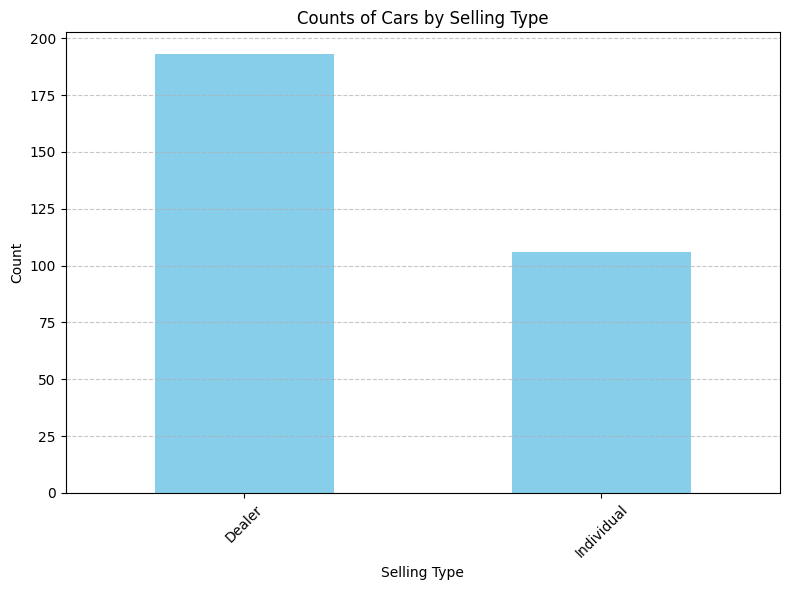

In [57]:
# Count the number of cars for each selling type
selling_type_counts = df['Selling_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
selling_type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Cars by Selling Type')
plt.xlabel('Selling Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Plotting Pie chart for Proportion of Transmission Types**

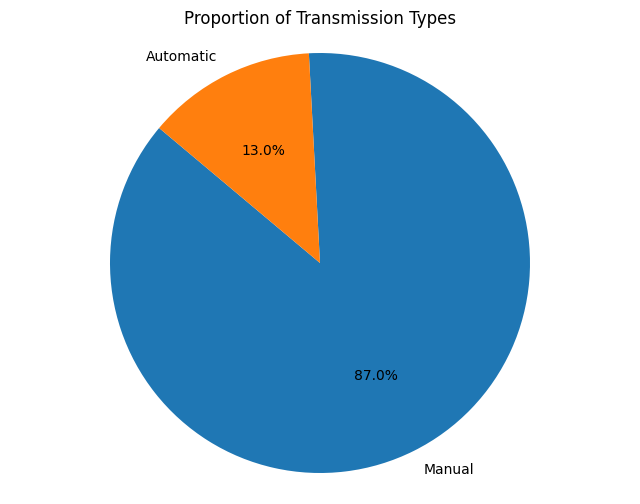

In [58]:
# Count the occurrences of each transmission type
transmission_counts = df['Transmission'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Transmission Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Comparison of Present Price and Selling Price w.r.t Years**

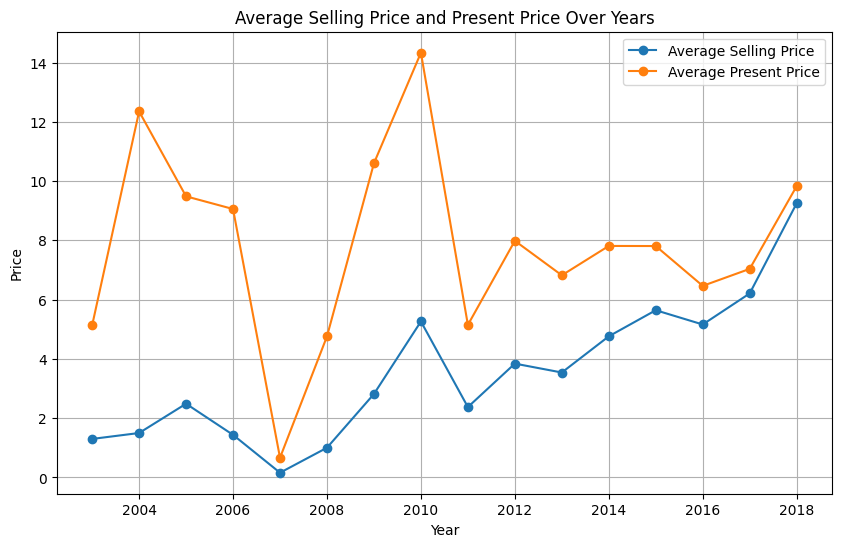

In [59]:
# Convert 'Year' column to datetime format
#df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group by 'Year' and calculate the mean selling price and present price for each year
selling_price_by_year = df.groupby(df['Year'])['Selling_Price'].mean()
present_price_by_year = df.groupby(df['Year'])['Present_Price'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plotting average selling price
plt.plot(selling_price_by_year.index, selling_price_by_year.values, marker='o', linestyle='-', label='Average Selling Price')

# Plotting average present price
plt.plot(present_price_by_year.index, present_price_by_year.values, marker='o', linestyle='-', label='Average Present Price')

plt.title('Average Selling Price and Present Price Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()  
plt.grid(True)
plt.show()

**Generating Correlation Matrix**

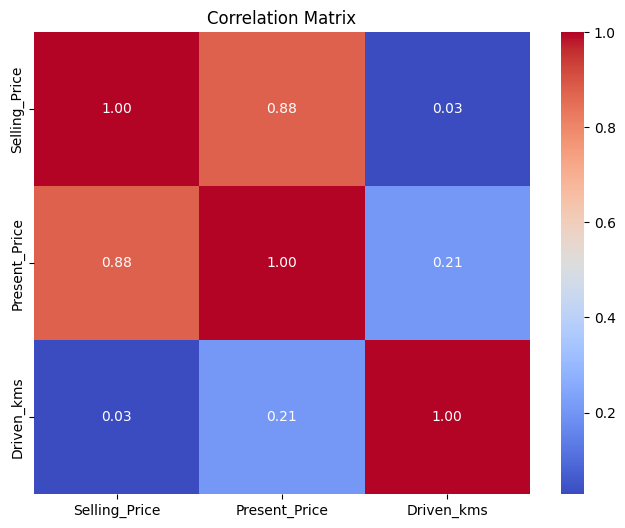

In [60]:
# Selecting only the numerical columns for correlation analysis
numerical_df = df[['Selling_Price', 'Present_Price', 'Driven_kms']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

**Normalization of the Dataset**

In [61]:
# Select numerical columns for normalization
numerical_cols = ["Selling_Price", "Present_Price", "Driven_kms", "Owner", "Fuel_Type_encoded", "Selling_type_encoded", "Transmission_encoded"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [62]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded
0,ritz,2014,0.093123,0.057109,0.053053,Petrol,Dealer,Manual,0.0,1.0,0.0,1.0
1,sx4,2013,0.133238,0.099913,0.085085,Diesel,Dealer,Manual,0.0,0.5,0.0,1.0
2,ciaz,2017,0.204871,0.103273,0.012813,Petrol,Dealer,Manual,0.0,1.0,0.0,1.0
3,wagon r,2011,0.078797,0.041504,0.009409,Petrol,Dealer,Manual,0.0,1.0,0.0,1.0
4,swift,2014,0.128940,0.070980,0.083984,Diesel,Dealer,Manual,0.0,0.5,0.0,1.0


In [63]:
df = df.drop(columns=['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'])

In [64]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded
0,2014,0.093123,0.057109,0.053053,0.0,1.0,0.0,1.0
1,2013,0.133238,0.099913,0.085085,0.0,0.5,0.0,1.0
2,2017,0.204871,0.103273,0.012813,0.0,1.0,0.0,1.0
3,2011,0.078797,0.041504,0.009409,0.0,1.0,0.0,1.0
4,2014,0.128940,0.070980,0.083984,0.0,0.5,0.0,1.0


**Splitting the Dataset into Train and Test dataset**

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Linear Regression**

In [66]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, Y_train)
accuracy_lg = model1.score(X_test, Y_test)*100
accuracy_lg


74.09934356413528

**Decision Tree Regression**

In [67]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train,Y_train)
accuracy_dtr = model2.score(X_test,Y_test)*100
accuracy_dtr

78.3628541654883

**Random Forest Regression**

In [68]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(X_train,Y_train)
accuracy_rfr = model3.score(X_test,Y_test)*100
accuracy_rfr

53.54038777956627

**Support Vector Regression (SVR)**

In [69]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Regressor
model4 = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used for SVR

# Fit the model on the scaled training data
model4.fit(X_train_scaled, Y_train)
accuracy_svr = model4.score(X_test_scaled,Y_test)*100
accuracy_svr

51.49455101822953

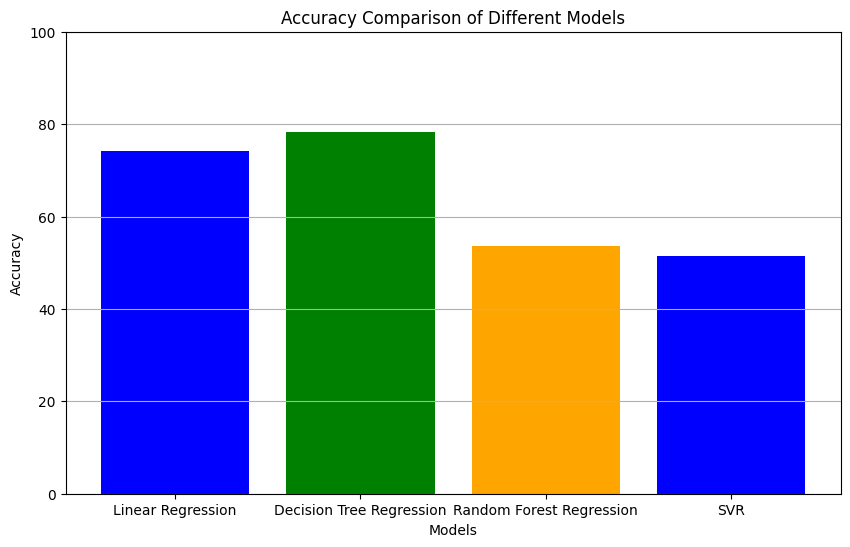

In [70]:
# Model names and their corresponding accuracy scores
models = ['Linear Regression','Decision Tree Regression', 'Random Forest Regression', 'SVR']
accuracy_scores = [accuracy_lg, accuracy_dtr, accuracy_rfr, accuracy_svr]  

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 100)  
plt.grid(axis='y')  
plt.show()

**Mean-Squared Error Calculation of each model**

In [71]:
from sklearn.metrics import mean_squared_error

Y_predict_m1 = model1.predict(X_test)

Y_predict_m2 = model2.predict(X_test)

Y_predict_m3 = model3.predict(X_test)

Y_predict_m4 = model4.predict(X_test_scaled)

mse_m1 = mean_squared_error(Y_test, Y_predict_m1)

mse_m2 = mean_squared_error(Y_test, Y_predict_m2)

mse_m3 = mean_squared_error(Y_test, Y_predict_m3)

mse_m4 = mean_squared_error(Y_test, Y_predict_m4)

print(mse_m1)

print(mse_m2)

print(mse_m3)

print(mse_m4)



0.005480615184187563
0.00457845036849725
0.009830919027758385
0.010263820952322169
